<a href="https://colab.research.google.com/github/Abdulazizkoja1/T5/blob/main/Abdulaziz__Koja_WEEK4_Task_1_Artificial_Neural_Networks_(ANN)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
#!pip install gdown
#!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.callbacks import Callback
import tensorflow as tf
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from scipy.sparse import hstack
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

## Importing Libraries

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df.head(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,10/16/2015 07:20:00 AM,10/28/2015 09:38:00 AM,NaN,...,15mins,3,Yes,Yes,Yes,10/28/2015 09:38:00 AM,NaN,10/28/2015 09:38:12 AM,Running Late,School-Age
6,2015-2016,1226116,Pre-K/EI,9304,4,Heavy Traffic,C353,10/29/2015 08:09:00 AM,10/29/2015 08:11:00 AM,Bronx,...,20MIN,3,Yes,Yes,Yes,10/29/2015 08:11:00 AM,NaN,10/29/2015 08:11:28 AM,Running Late,Pre-K
7,2015-2016,1214953,Pre-K/EI,GV0365,3,Heavy Traffic,C579,09/16/2015 07:57:00 AM,09/16/2015 07:58:00 AM,Bronx,...,10MIN,4,Yes,Yes,No,09/16/2015 07:58:00 AM,NaN,09/16/2015 07:58:19 AM,Running Late,Pre-K
8,2015-2016,1215730,Special Ed AM Run,5628D,Q363,Heavy Traffic,26177,09/18/2015 07:50:00 AM,09/18/2015 07:04:00 AM,Queens,...,45MINS,0,Yes,Yes,No,09/18/2015 07:04:00 AM,NaN,09/18/2015 07:04:29 AM,Running Late,School-Age
9,2015-2016,1226326,Pre-K/EI,0003,03 AM,Other,C494,10/30/2015 06:30:00 AM,10/30/2015 06:57:00 AM,Brooklyn,...,35 Minutes,0,Yes,Yes,No,10/30/2015 06:57:00 AM,NaN,10/30/2015 06:57:13 AM,Running Late,Pre-K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
Running Late,130857
Breakdown,17115


In [ ]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
df = df.drop(columns=['Busbreakdown_ID','Incident_Number','Occurred_On',	'Created_On','Last_Updated_On','Informed_On'])

In [ ]:
df.duplicated().sum()

19926

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Run_Type                         147883 non-null  object
 2   Bus_No                           147972 non-null  object
 3   Route_Number                     147884 non-null  object
 4   Reason                           147870 non-null  object
 5   Schools_Serviced                 147972 non-null  object
 6   Boro                             141654 non-null  object
 7   Bus_Company_Name                 147972 non-null  object
 8   How_Long_Delayed                 126342 non-null  object
 9   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 10  Has_Contractor_Notified_Schools  147972 non-null  object
 11  Has_Contractor_Notified_Parents  147972 non-null  object
 12  Have_You_Alerted

<Axes: ylabel='Frequency'>

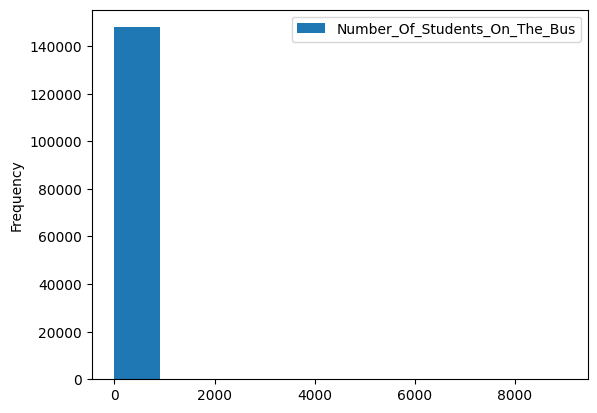

In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns
df[num_cols].plot(kind='hist')

<Axes: >

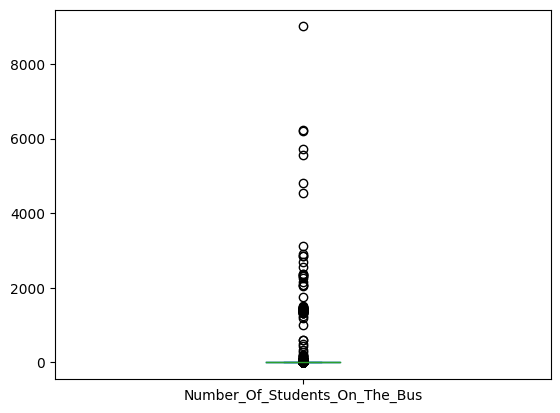

In [ ]:
df[num_cols].plot(kind='box')

<Axes: >

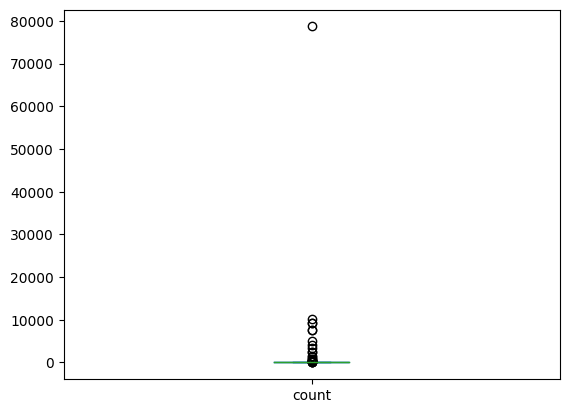

In [ ]:
df['Number_Of_Students_On_The_Bus'].value_counts().plot(kind='box')

In [ ]:
Q1 = df['Number_Of_Students_On_The_Bus'].quantile(0.25)
Q3 = df['Number_Of_Students_On_The_Bus'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the acceptable range for the data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df[(df['Number_Of_Students_On_The_Bus'] >= lower_bound) & (df['Number_Of_Students_On_The_Bus'] <= upper_bound)]

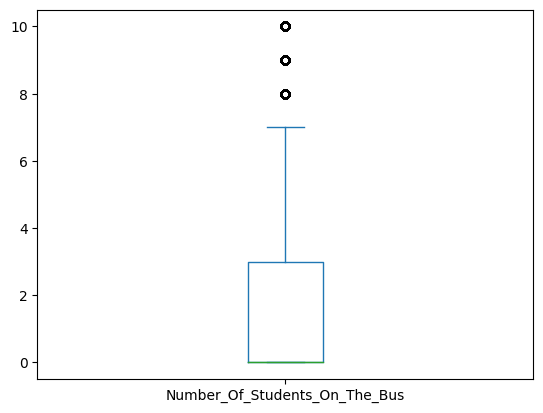

In [ ]:
df = df_cleaned['Number_Of_Students_On_The_Bus'].plot(kind='box')

In [ ]:
df=df_cleaned

In [ ]:
corr_matrix = df_cleaned[num_cols].corr()
corr_matrix

,Number_Of_Students_On_The_Bus
Number_Of_Students_On_The_Bus,1.0


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:

# Split features and target
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

# Separate categorical and numerical columns
cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(exclude=['object']).columns

# OrdinalEncode categorical columns
oe = OrdinalEncoder()
X_cat_encoded = oe.fit_transform(X[cat_columns])
X_cat_df = pd.DataFrame(X_cat_encoded, columns=cat_columns)

# Standardize numerical columns
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_columns])
X_num_df = pd.DataFrame(X_num_scaled, columns=num_columns)

# Combine the transformed numerical and categorical dataframes
X_final = pd.concat([X_num_df.reset_index(drop=True), X_cat_df.reset_index(drop=True)], axis=1)

# Show the first few rows to confirm
print(X_final.head())


   Number_Of_Students_On_The_Bus  School_Year  Run_Type  Bus_No  Route_Number  \
0                       1.173480          0.0       3.0  7410.0          76.0   
1                       0.429056          0.0       3.0  8039.0          76.0   
2                       0.429056          0.0       7.0  1170.0        5751.0   
3                       0.429056          0.0       3.0  8042.0         430.0   
4                       0.801268          0.0       3.0  8894.0         261.0   

   Reason  Schools_Serviced  Boro  Bus_Company_Name  How_Long_Delayed  \
0     6.0            4919.0   1.0              26.0             182.0   
1     3.0            4986.0   1.0              26.0             810.0   
2     3.0            3503.0   NaN               0.0             452.0   
3     3.0            4919.0   1.0              26.0             726.0   
4     3.0            4971.0   1.0              26.0             179.0   

   Has_Contractor_Notified_Schools  Has_Contractor_Notified_Parents  \
0  

In [ ]:
y = LabelEncoder().fit_transform(y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y,test_size=0.25,random_state=42)

In [ ]:
# over-sampling
imputer = SimpleImputer(strategy='mean')
X_final_imputed = imputer.fit_transform(X_final)

smote = SMOTE(random_state=42, k_neighbors=1)
X_final_resampled, y_resampled = smote.fit_resample(X_final_imputed, y)

In [ ]:
if len(y_train.shape) == 1:
    y_train = np.reshape(y_train, (-1, 1))

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model = Sequential()

model.add(Flatten())
#Hidden layers
model.add(Dense(units=10, activation='relu'))
droupout = Dropout(0.2)
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=40, activation='relu'))

#Output layer
model.add(Dense(units=1, activation='sigmoid')) # I use sigmode becouse is binery

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=[tf.keras.metrics.F1Score()])

## Training the Model
Train the ANN model using the training data.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train,y_train, epochs=10, validation_split=0.2,callbacks=[EarlyStopping(patience=5)])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2628/2631 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.0055 - loss: nan

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2631/2631 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - f1_score: 0.0055 - loss: nan - val_f1_score: 0.0000e+00 - val_loss: nan
Epoch 2/10
2631/2631 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - f1_score: 0.0000e+00 - loss: nan - val_f1_score: 0.0000e+00 - val_loss: nan
Epoch 3/10
2631/2631 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - f1_score: 0.0000e+00 - loss: nan - val_f1_score: 0.0000e+00 - val_loss: nan
Epoch 4/10
2631/2631 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - f1_score: 0.0000e+00 - loss: nan - val_f1_score: 0.0000e+00 - val_loss: nan
Epoch 5/10
2631/2631 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - f1_score: 0.0000e+00 - loss: nan - val_f1_score: 0.0000e+00 - val_loss: nan


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)

In [ ]:
model.evaluate(X_test,y_test)

1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - f1_score: 0.0000e+00 - loss: nan


[nan, 0.0]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.predict(X_test)

1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

<Axes: >

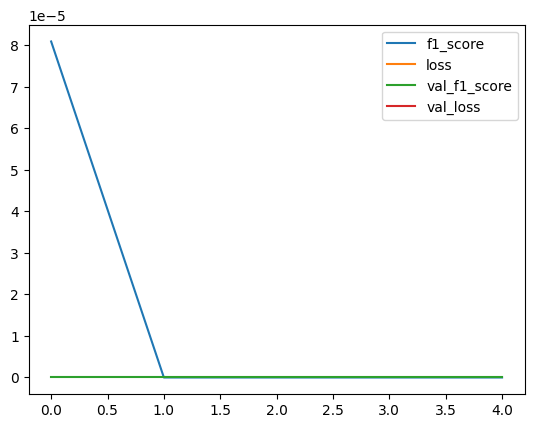

In [ ]:
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?


1. **Data Preprocessing:**
   - **Normalization** was used to scale numerical features, ensuring all features contribute equally to training.
   - **Encoding** converted categorical data into a format the model can understand, allowing it to learn from categorical features.

2. **Model Architecture:**
   - The architecture included **Dense layers** with ReLU activation and a suitable number of neurons to capture data patterns, ending with a Softmax or Sigmoid output for classification.

3. **Training Process:**
   - A moderate **batch size** and the **Adam optimizer** were chosen for stability and efficiency. The **number of epochs** was determined using early stopping to prevent overfitting.

4. **Loss Function and Metrics:**
   - **Cross-Entropy Loss** was used for classification, with metrics like **Accuracy, Precision, Recall,** and **F1-score** to measure model performance comprehensively.

5. **Regularization Techniques:**
   - **Dropout** was used to prevent overfitting by randomly dropping neurons during training.

6. **Model Evaluation:**
   - **Accuracy, Precision, Recall,** and **F1-score** were selected to evaluate how well the model performs on the classification task, especially for imbalanced data.

7. **Model Tuning:**
   - **Hyperparameter tuning** (e.g., learning rate, dropout rate) was performed to optimize model performance.

8. **Overfitting and Underfitting:**
   - To prevent **overfitting**, early stopping and dropout were used. **Underfitting** was addressed by potentially increasing the model’s complexity or training time.